In [1]:
import sys, os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
All_min_dist_S_SH = []

## six s8 + six gsh 
savedir = ".../6gsh-6s8/results/"
directories = ["1", "2", "3", "4", "5"]
for i, dir in enumerate(directories):
    data = np.load(savedir + "S8-SH_gsh-minDis-"+dir+".npy")
    frameTim = data[:, 0] 
    distMin = data[:, 1]
    All_min_dist_S_SH.append(distMin)
    
## six s8 + ten gsh 
savedir = ".../10gsh-6s8/results/"
directories = ["1", "2", "3", "4", "5"]
for i, dir in enumerate(directories):
    data = np.load(savedir + "S8-SH_gsh-minDis-"+dir+".npy")
    frameTim = data[:, 0] 
    distMin = data[:, 1]
    All_min_dist_S_SH.append(distMin)
    
    
All_min_dist_S_SH = np.array(All_min_dist_S_SH)    
print(All_min_dist_S_SH.shape)
All_min_dist_S_SH = np.hstack(All_min_dist_S_SH[:]/10)
print(All_min_dist_S_SH.shape)
print(np.max(All_min_dist_S_SH), np.min(All_min_dist_S_SH), )

(10, 4001)
(40010,)
4.351194816380231 0.21039283741563258


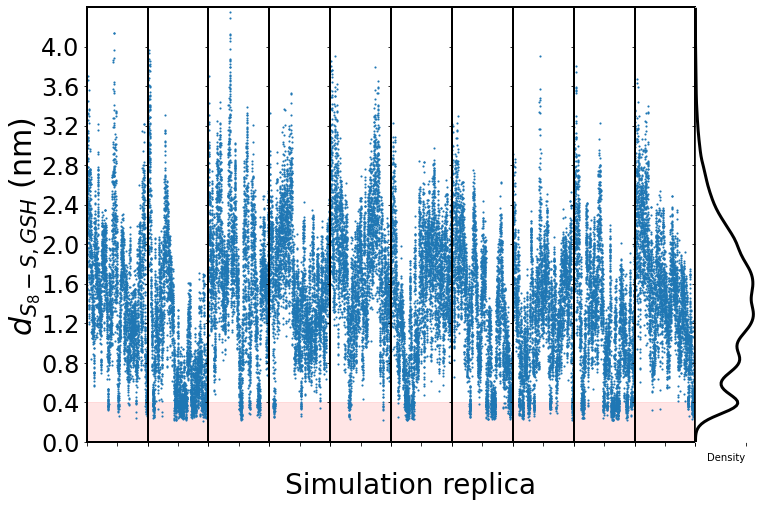

In [ ]:

fig, axes = plt.subplots(1, 11, figsize=(12, 8), sharex=False, sharey=True)

# First set of data (6 GSH + 6 S8)
savedir1 = ".../6gsh-6s8/results/"
directories1 = ["1", "2", "3", "4", "5"]

# Second set of data (10 GSH + 6 S8)
savedir2 = ".../10gsh-6s8/results/"
directories2 =["1", "2", "3", "4", "5"]

# Combine all directories
all_directories = directories1 + directories2
all_savedirs = [savedir1] * len(directories1) + [savedir2] * len(directories2)

for i, (dir, savedir) in enumerate(zip(all_directories, all_savedirs)):
    data = np.load(savedir + "S8-SH_gsh-minDis-" + dir + ".npy")
    frameTim = data[:, 0]
    distMin = data[:, 1]
    distMin = distMin[:]/10
    
    axes[i].fill_between(np.arange(0, 500, 1), 0, .4, alpha=0.1, color='red')
    axes[i].scatter(frameTim, distMin, s=5, marker='.')
    axes[i].set_xlim(0, 500)
    axes[i].set_ylim(0, 4.4)
    axes[i].set_xticklabels([])
    
    for spine in axes[i].spines.values():
        spine.set_linewidth(2)


sns.kdeplot(y=All_min_dist_S_SH, color='black', ax=axes[-1], lw=3)
axes[-1].set_xticklabels([])

# Update spine colors for visual consistency
axes[-1].spines['bottom'].set_color('white')   
axes[-1].spines['left'].set_color('black')  
axes[-1].spines['right'].set_color('white')
axes[-1].spines['top'].set_color('white')


axes[0].tick_params(axis='y', labelsize=24) 
axes[0].set_yticks(np.arange(0.0, 4.4, 0.4))


fig.text(0.5, 0.035, "Simulation replica", ha='center', fontsize=28, color='black')
fig.text(0.033, 0.5, r"$d_{S_{8}-S,GSH}$ (nm)", va='center', rotation='vertical', fontsize=30, color='black')

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("/hits/fast/mbm/boushesr/OctaSulfur-S8/membrane-simulations/ds-s.pdf", bbox_inches='tight', transparent=True)
plt.savefig("/hits/fast/mbm/boushesr/OctaSulfur-S8/membrane-simulations/ds-s.svg", bbox_inches='tight', transparent=True)
# plt.savefig("/hits/fast/mbm/boushesr/OctaSulfur-S8/membrane-simulations/ds-s.png", bbox_inches='tight', transparent=True)
